# Example: Batch Training of the Perceptron Classifier
This example will familiarize students with training the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) to classify a linear separable data set $\mathcal{D}$. The [Perceptron](https://en.wikipedia.org/wiki/Perceptron) learns a linear decision boundary between 
two classes. There exists a data set
$\mathcal{D} = \left\{(\mathbf{x}_{1},y_{1}),\dotsc,(\mathbf{x}_{N},y_{N})\right\}$ with $N$ examples, with labels $y_{i}\in\{-1,1\}$, and features $\mathbf{x}_{i}\in\mathbb{R}^{n}$.
The Perceptron computes label $y$ for feature vector $\mathbf{x}$ as:
\begin{equation*}
    y = \text{sign}\left(\mathbf{w}^{T}\cdot\mathbf{x}\right)
\end{equation*}
where $\mathbf{w}=\left(w_{1},\dots,w_{N}, b\right)$ is a vector of weights $w$ and a bias $b$, 
$\mathbf{x}=\left(x_{1},\dots,x_{n}, 1\right)$ is a feature vector,
and $\text{sign}(z)$ is the sign function:
\begin{equation*}
    \text{sign}(z) = 
    \begin{cases}
        1 & \text{if}~z\geq{0}\\
        -1 & \text{if}~z<0
    \end{cases}
\end{equation*}
If data set $\mathcal{D}$ is linearly separable, the Perceptron will find a separating hyperplane in a finite number of passes 
through $\mathcal{D}$. However, if the data set $\mathcal{D}$ is not linearly separable, the Perceptron will not converge.

## Setup
This example requires several external libraries and a function to compute the outer product. Let's download and install these packages and call our `Include.jl` file.

In [1]:
include("Include.jl")

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Manifest.toml`


## Prerequisites
Before we implement the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) and its training algorithm, let's generate a random linearly separable dataset $\mathcal{D}$ which we'll use to train and test the [Perceptron](https://en.wikipedia.org/wiki/Perceptron). First, let's set the number of samples `N` that we have in the data set $\mathcal{D}$, and the number of feature variables `n`, i.e., the number of elements of $\mathbf{x}$:

In [2]:
N = 1000; # assume we have N-samples
n = 2; # we have n features

Next, let's write a code to generate a [lineraly separable data set](https://en.wikipedia.org/wiki/Linear_separability) that we can use to train our [Perceptron](https://en.wikipedia.org/wiki/Perceptron), i.e., the data set $\mathcal{D}$.
* To do this, let's generate random points and check the $y\cdot\left(\mathbf{w}^{T}\cdot\mathbf{x}\right) > 0$ condition. If this condition is true, we `accept` that data; otherwise, we `reject` the data. If we `accept` the data, we store it in the `dataset` variable, a [Set](https://docs.julialang.org/en/v1/base/collections/#Base.Set) holding a [NamedTuple type](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple), which is a mix of a tuple and a dictionary.
* We keep iterating the loop until the number of elements of the `dataset` is greater than or equal to the desired number of test points specified in the `N` variable.

In [3]:
dataset = Set{@NamedTuple{x::Array{Float64,1},y::Int64}}(); 
w = randn(n+1);
classes = [-1,1];
should_keep_looping = true;
while (should_keep_looping == true)

    x = randn(n) |> x -> push!(x,1); # generate a feature vector
    y = rand(1:2) |> i-> classes[i]; # generate a class 
    
    # check -
    if (y*(sum(w.*x)) > 0)
        data = (x = x, y = y);
        push!(dataset,data);
    end

    # if we have enough examples, stop iterating
    if (length(dataset) >= N)
        should_keep_looping = false
    end
end

## Training
Next, let's implement the `BATCH-TRAINING-PERCEPTRON` procedure from the lecture notes to estimate a value for the weight vector $\mathbf{w}$ given the training data in the `dataset` variable.

In [4]:
ŵ = rand(n+1); # initialize
while true
    
    error_counter = 0;
    for data ∈ dataset
        
        x = data[:x];
        y = data[:y];
        
        # check:
        if (y*sum(ŵ.*x)) < 0
            ŵ = ŵ .+ y*x;
            error_counter+=1        
        end
    end
    
    if (error_counter == 0)
        break;
    end
end

## Visualize
`Unhide` the code block below to see how we plotted the points in `dataset`, and the separating hyperplane used as a decision rule by our [Perceptron](https://en.wikipedia.org/wiki/Perceptron) agent.

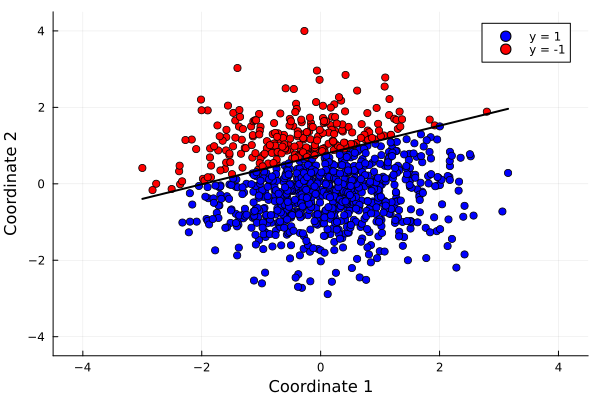

In [7]:
p = plot();
label_class_1 = false;
label_class_2 = false;
for data ∈ dataset

    x = data[:x];
    y = data[:y];
    if y == 1
        if (label_class_1 == false)
            scatter!([x[1]],[x[2]], c=:blue, label="y = 1")
            label_class_1 = true;
        else
            scatter!([x[1]],[x[2]], c=:blue, label="")
        end
    else

        if (label_class_2 == false)
            scatter!([x[1]],[x[2]], c=:red, label="y = -1")
            label_class_2 = true;
        else
            scatter!([x[1]],[x[2]], c=:red, label="")
        end
    end
end

H = Array{Float64,2}(undef, N, 2);
i = 1;
for data ∈ dataset
    x = data[:x];
    x1 = x[1];
    x2 = -(ŵ[1]/ŵ[2])*x1 - ŵ[3]/ŵ[2];
    H[i,1] = x1;
    H[i,2] = x2;
    i += 1
end

plot!(H[:,1], H[:,2], xlims=(-4.5,4.5), ylims=(-4.5,4.5), lw=2, c=:black, label="")

xlabel!("Coordinate 1",fontsize=18)
ylabel!("Coordinate 2",fontsize=18)
current()

In [6]:
[w ŵ]

3×2 Matrix{Float64}:
  0.186412   1.56284
 -0.496218  -4.08006
  0.372682   3.07821